In [1]:
import sys  
sys.path.insert(0, '../py')
from graviti import *

import numpy as np
import os
import os.path
from os import path
import sys
import glob
import h5py
import pandas as pd
import pickle
import timeit
import multiprocessing
from joblib import Parallel, delayed
from datetime import datetime
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg') # to not display figure while using ssh 

import warnings
warnings.filterwarnings('ignore')

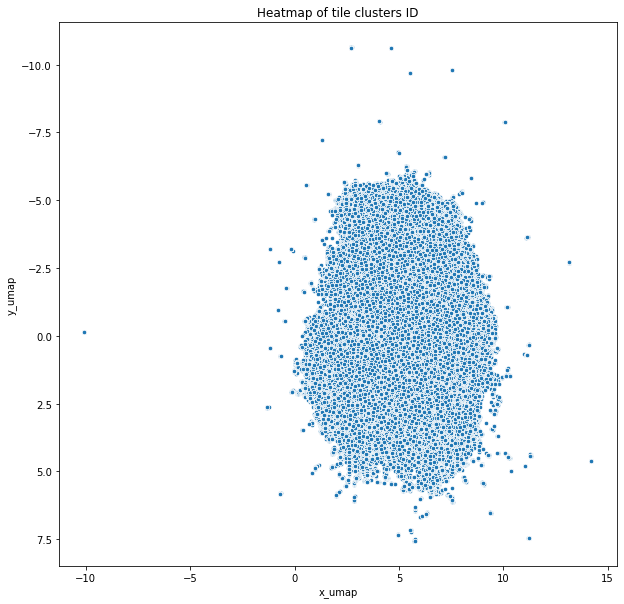

In [18]:
sample = 'TCGA-2F-A9KO-01Z-00-DX1.nuclei1541213.numbCovd154121.freq10.covdNN20.features_woCentroids.pkl' # the sample's data file

sample_size = 50000
df = pd.read_pickle(sample).head(sample_size) # load the first instance of a WSI

import umap
reducer = umap.UMAP(n_components=2)

data = np.array(df[df['covd']==1].descriptor.tolist()) # generate the global array of tiles

embedding = reducer.fit_transform(data) # reduce to lowD with umap

x_umap = embedding[:,0]
y_umap = embedding[:,1]

df['x_umap'] = x_umap
df['y_umap'] = y_umap

# Clustering
#from sklearn.cluster import KMeans
#mat_umap = df[['x_umap','y_umap']].values
#kmeans = KMeans(n_clusters=2, random_state=42).fit(mat_umap)
#df['UMAP_cluster_ID'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x="x_umap",
                     y="y_umap",
#                     hue="UMAP_cluster_ID",
                     s=20,alpha=1.0,
                     data=df)
plt.title('Heatmap of tile clusters ID', fontsize=12)
ax.invert_yaxis()
plt.show()
#filename = 'heatmap.s'+str(df.shape[0])+'.pdf'
#plt.savefig(filename)

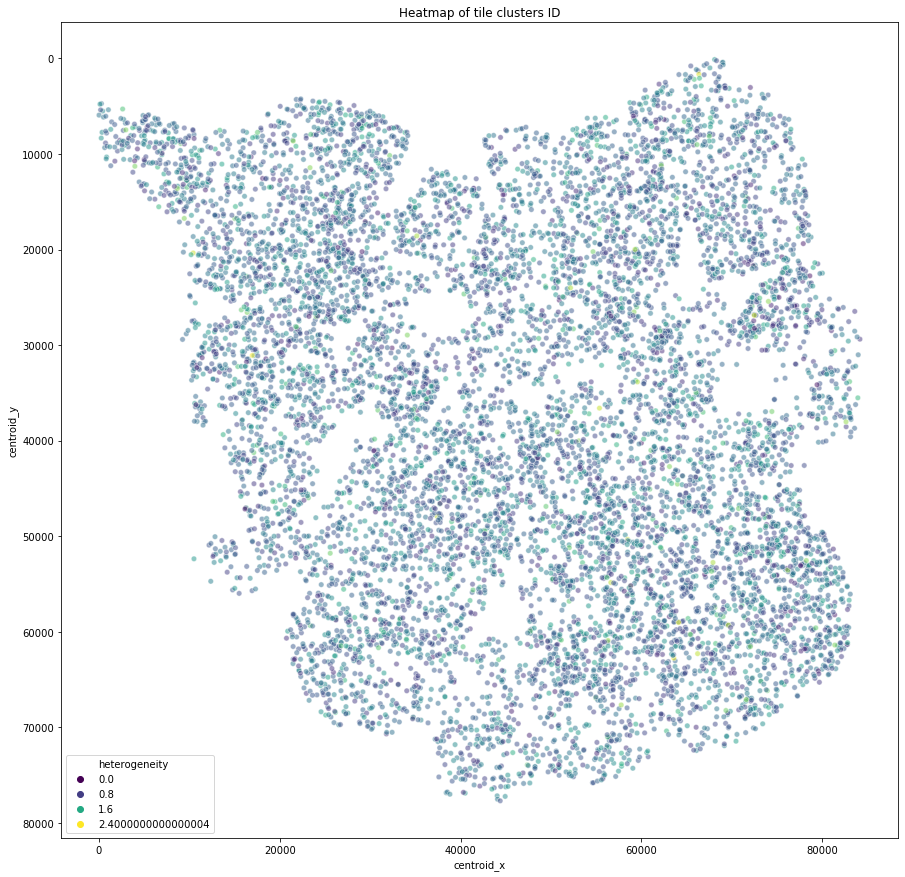

In [86]:
#sample = 'TCGA-2F-A9KO-01Z-00-DX1.nuclei1541213.numbCovd154121.freq10.covdNN50.features.pkl' # the sample's data file
sample = 'TCGA-G2-A2EJ-01Z-00-DX2.nuclei1663946.numbCovd166394.freq10.covdNN50.features.pkl' # the sample's data file

sample_size = 10000
df = pd.read_pickle(sample).head(sample_size) # load the first instance of a WSI

fig, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(10, 220, sep=80, n=7)
ax = sns.scatterplot(#x="x_umap",y="y_umap",
                     x="centroid_x",y="centroid_y",
                     hue="heterogeneity",
                     s=30,alpha=0.5,
                     data=df,
                     markers="c",   
                     palette="viridis",
)
plt.title('Heatmap of tile clusters ID', fontsize=12)
ax.invert_yaxis()
plt.show()
#filename = 'heatmap.s'+str(df.shape[0])+'.pdf'
#plt.savefig(filename)

In [87]:
import umap
reducer = umap.UMAP(n_components=2)

data = np.array(df[df['covd']==1].descriptor.tolist()) # generate the global array of tiles

embedding = reducer.fit_transform(data) # reduce to lowD with umap

x_umap = embedding[:,0]
y_umap = embedding[:,1]

df['x_umap'] = x_umap
df['y_umap'] = y_umap

# Clustering
#from sklearn.cluster import KMeans
#mat_umap = df[['x_umap','y_umap']].values
#kmeans = KMeans(n_clusters=2, random_state=42).fit(mat_umap)
#df['UMAP_cluster_ID'] = kmeans.labels_

mean_proj = np.mean(embedding,axis=0)
umap_dist = np.linalg.norm(embedding-mean_proj,axis=1)

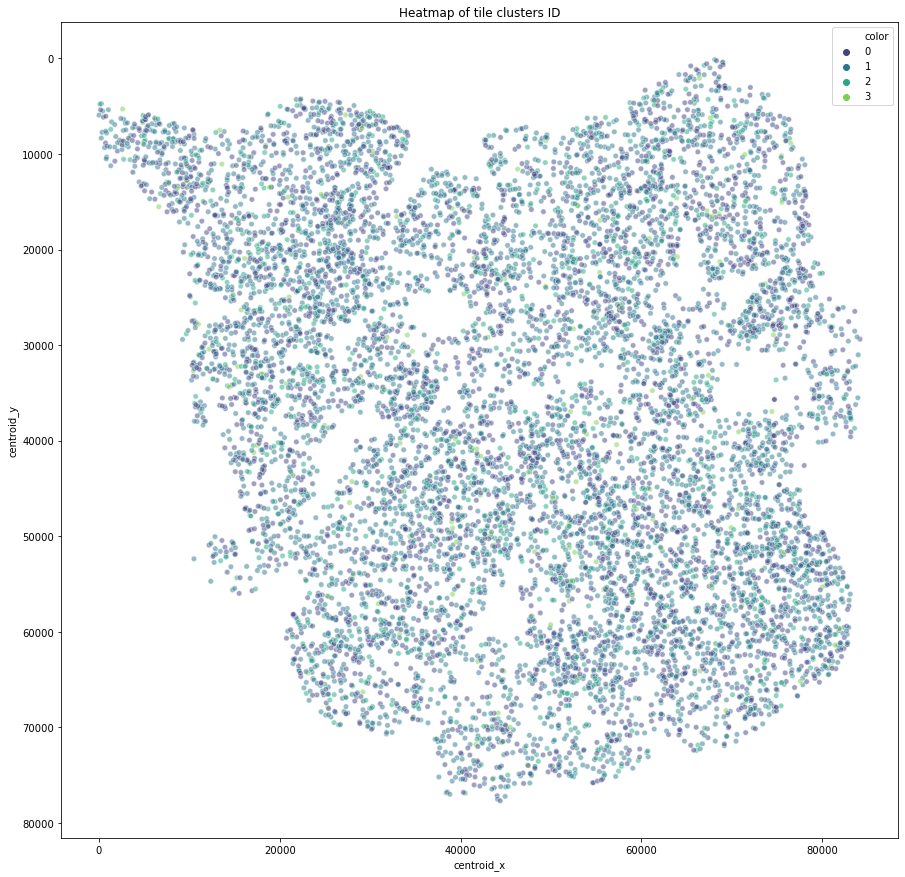

In [91]:
df['color'] = pd.cut(umap_dist,4,labels=False)#.astype(str)

fig, ax = plt.subplots(figsize=(15,15))
cmap = sns.color_palette("RdBu", n_colors=7)
ax = sns.scatterplot(#x="x_umap",y="y_umap",
                     x="centroid_x",y="centroid_y",
                     hue="color",
                     s=30,alpha=0.5,
                     data=df,
                     markers="c",   
                     palette=sns.color_palette("viridis", df.color.nunique()) ,
)
plt.title('Heatmap of tile clusters ID', fontsize=12)
ax.invert_yaxis()
plt.show()
#filename = 'heatmap.s'+str(df.shape[0])+'.pdf'
#plt.savefig(filename)